<a href="https://colab.research.google.com/github/JacobFV/AGI/blob/master/PGI0_0_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title imports
%tensorflow_version 2.x

import math
import tqdm
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q tsalib
import tsalib
import networkx
!pip install -q jplotlib
import jplotlib as jpl
!pip install -q livelossplot
from livelossplot import PlotLossesKeras

import tensorflow as tf
keras = tf.keras
tfkl = keras.layers

import tensorflow_probability as tfp
tfd = tfp.distributions
tfpl = tfp.layers
tfb = tfp.bijectors

## Simple Data

In [ ]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = keras.datasets.mnist.load_data()
mnist_x_train, mnist_x_test = mnist_x_train/255., mnist_x_test/255.

mnist_size = mnist_x_train.shape[1:]
mnist_classes = 10

mnist_size, mnist_classes

((28, 28), 10)

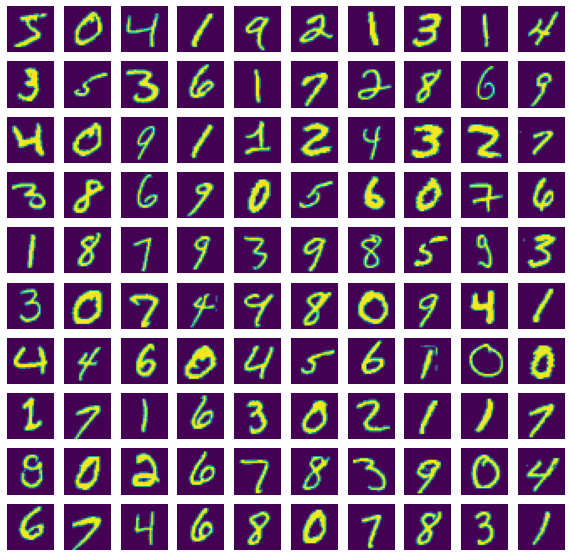

In [ ]:
gp = jpl.GridPlot()
for i in range(100):
    gp.imshow(mnist_x_train[i])
gp.show()

## linear predictor 0 X -> Y

Experiment not performed. 

Reason: I now realize how much menial work keras does for you 

In [ ]:
lp0 = keras.Sequential([
    tfkl.Flatten(),
    tfkl.Dense(mnist_classes, 'relu')
])

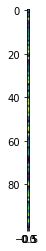

In [ ]:
plt.imshow(mnist_y_train[:100, None])

In [ ]:
mnist_y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


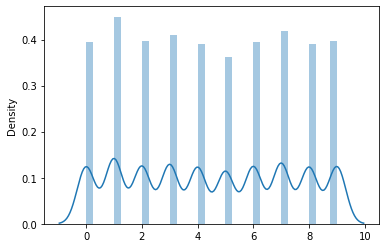

In [ ]:
sns.distplot(mnist_y_train)

In [ ]:
def train_lp(x, y, epochs, lp):
    opt = tf.optimizers.SGD(learning_rate=0.01)

    def loss_fn(x, y, lp):
        return keras.losses.SparseCategoricalCrossentropy(True)(y, lp(x))

    for epoch in tf.range(epochs):
        with tf.GradientTape() as tape:
            loss = loss_fn(x, y, lp)
        grads = tape.gradient(loss, lp.trainable_variables)
        opt.apply_gradients(zip(grads, lp.trainable_variables))

        tf.print(f'Epoch {epoch}: loss {loss}')

train_lp(mnist_x_train, mnist_y_train, 100, lp0)

Epoch 0: loss 1.4829840660095215
Epoch 1: loss 1.4828541278839111
Epoch 2: loss 1.4827244281768799
Epoch 3: loss 1.4825950860977173
Epoch 4: loss 1.4824658632278442
Epoch 5: loss 1.4823368787765503
Epoch 6: loss 1.482208251953125
Epoch 7: loss 1.4820797443389893
Epoch 8: loss 1.4819515943527222
Epoch 9: loss 1.481823444366455
Epoch 10: loss 1.481695532798767
Epoch 11: loss 1.4815679788589478
Epoch 12: loss 1.481440544128418
Epoch 13: loss 1.4813132286071777
Epoch 14: loss 1.4811865091323853
Epoch 15: loss 1.4810596704483032
Epoch 16: loss 1.4809333086013794
Epoch 17: loss 1.4808070659637451
Epoch 18: loss 1.4806809425354004
Epoch 19: loss 1.4805551767349243
Epoch 20: loss 1.4804294109344482
Epoch 21: loss 1.4803041219711304
Epoch 22: loss 1.480178952217102
Epoch 23: loss 1.4800539016723633
Epoch 24: loss 1.4799293279647827
Epoch 25: loss 1.479804515838623
Epoch 26: loss 1.4796802997589111
Epoch 27: loss 1.4795562028884888
Epoch 28: loss 1.479432463645935
Epoch 29: loss 1.47930860519409

KeyboardInterrupt: ignored

2.2 &approx; -log(0.1) (init)
1.47 &approx; -log(0.4) (covergence)

## linear predictor 1 X -> Y

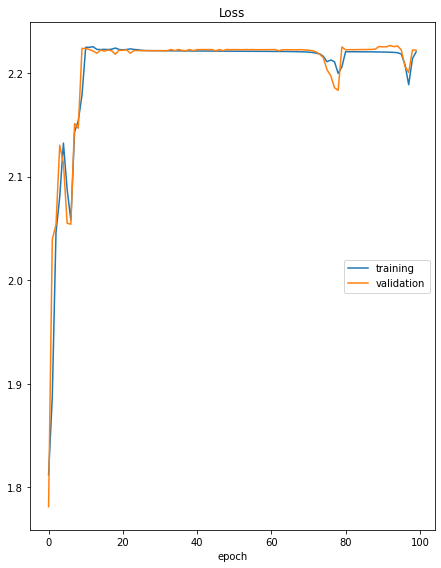

Loss
	training         	 (min:    1.812, max:    2.225, cur:    2.220)
	validation       	 (min:    1.781, max:    2.227, cur:    2.222)


In [ ]:
lp1 = keras.Sequential([
    tfkl.Flatten(),
    tfkl.Dense(mnist_classes, 'relu')
])

lp1.compile('sgd', loss=keras.losses.SparseCategoricalCrossEntropy(True))

lp1.fit(mnist_x_train, mnist_y_train,
        epochs=100,
        verbose=1,
        callbacks=[PlotLossesKeras()],
        validation_data=(mnist_x_test, mnist_y_test))